# 分类变量

## One-Hot编码

In [2]:
import pandas as pd
from IPython.display import display

data=pd.read_csv("data/adult.data",header=None,index_col=False,
                names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
                      'relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country',
                      'income'])
data=data[['age','workclass','education','gender','hours-per-week','occupation','income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [4]:
print("Original features:\n{}".format(list(data.columns)))
data_dummies=pd.get_dummies(data)
print("Features after dummies:\n",list(data_dummies.columns),"\n")

Original features:
['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']
Features after dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',

In [5]:
features=data_dummies.loc[:,'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values
print("X.shape {} y.shape {}".format(X.shape,y.shape))

X.shape (32561, 44) y.shape (32561,)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print("Test score:{:.2f}".format(logreg.score(X_test,y_test)))

Test score:0.81


## 整数编码位分类变量

In [7]:
demo_df=pd.DataFrame({'Integer feature':[0,1,2,1],
                    'Categorical feature':['sock','fox','sock','fox']})
display(demo_df)

,Integer feature,Categorical feature
0,0,sock
1,1,fox
2,2,sock
3,1,fox


In [8]:
pd.get_dummies(demo_df)

,Integer feature,Categorical feature_fox,Categorical feature_sock
0,0,0,1
1,1,1,0
2,2,0,1
3,1,1,0


In [9]:
demo_df['Integer feature']=demo_df['Integer feature'].astype(str)
pd.get_dummies(demo_df,columns=['Integer feature','Categorical feature'])

,Integer feature_0,Integer feature_1,Integer feature_2,Categorical feature_fox,Categorical feature_sock
0,1,0,0,0,1
1,0,1,0,1,0
2,0,0,1,0,1
3,0,1,0,1,0


# 分箱、离散化、线性模型与树

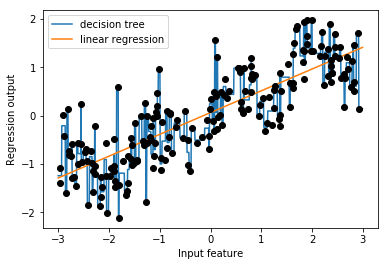

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
from matplotlib import pyplot as plt

X,y=mglearn.datasets.make_wave(n_samples=200)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg=DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label="decision tree")

reg=LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label="linear regression")

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

## 分箱

In [12]:
bins=np.linspace(-3,3,11)
print("bins:{}".format(bins))

which_bins=np.digitize(X,bins=bins)
print("\nData points:\n",X[:5]);
print("\nBin membership for data points\n",which_bins[:5])

bins:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)
encoder.fit(which_bins)
X_binned=encoder.transform(which_bins)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5,0,'Input feature')

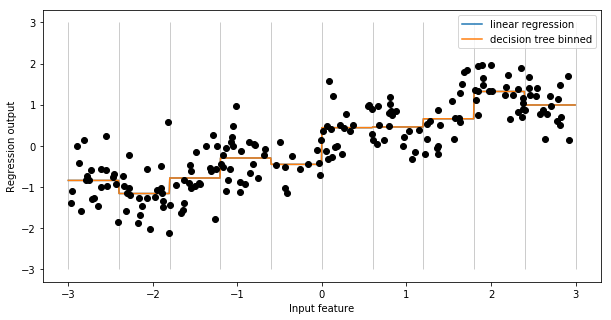

In [46]:
line_binned=encoder.transform(np.digitize(line,bins=bins))

plt.figure(figsize=(10,5))
reg=LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='linear regression')

reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label='decision tree binned')

plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linewidth=1,alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

# 交互特征与多项式特征

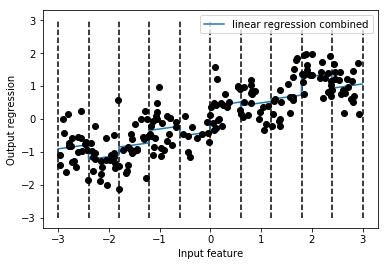

In [51]:
X_combined=np.hstack([X,X_binned])

reg=LinearRegression().fit(X_combined,y)
line_combined=np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label='linear regression combined')

plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linestyles='dashed',colors='k')
plt.xlabel("Input feature")
plt.ylabel("Output regression")
plt.legend(loc="best")

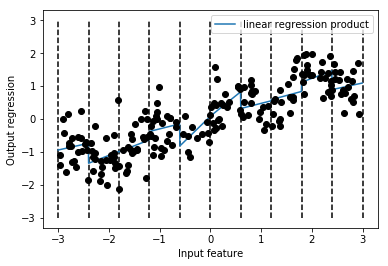

In [52]:
X_product=np.hstack([X,X*X_binned])

reg=LinearRegression().fit(X_product,y)
line_product=np.hstack([line,line*line_binned])
plt.plot(line,reg.predict(line_product),label='linear regression product')

plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linestyles='dashed',colors='k')
plt.xlabel("Input feature")
plt.ylabel("Output regression")
plt.legend(loc="best")

In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly=poly.transform(X)

print(X_poly.shape)
print("X_poly featurenames:\n{}".format(poly.get_feature_names()))

(200, 10)
X_poly featurenames:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


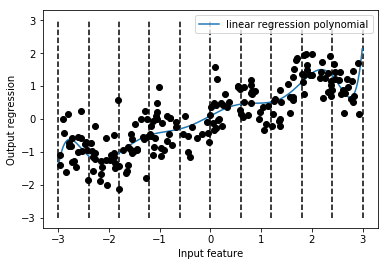

In [58]:
reg=LinearRegression().fit(X_poly,y)
line_poly=poly.transform(line)
plt.plot(line,reg.predict(line_poly),label='linear regression polynomial')

plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linestyles='dashed',colors='k')
plt.xlabel("Input feature")
plt.ylabel("Output regression")
plt.legend(loc="best")

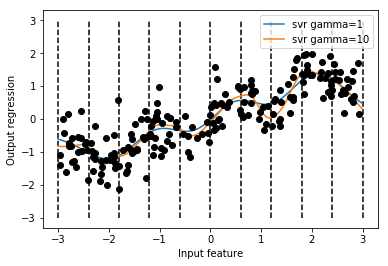

In [59]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label="svr gamma={}".format(gamma))

plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linestyles='dashed',colors='k')
plt.xlabel("Input feature")
plt.ylabel("Output regression")
plt.legend(loc="best")

## 应用boston数据集

In [62]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston=load_boston()
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=0)

scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

poly=PolynomialFeatures(degree=2)
poly.fit(X_train_scaled)
X_train_poly=poly.transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)

print("X_train_poly shape\n",X_train_poly.shape)
print("X_test_poly shape\n",X_test_poly.shape)

X_train_poly shape
 (379, 105)
X_test_poly shape
 (127, 105)


In [68]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train_scaled,y_train)
print("Score without interactions:{:.3f}".format(ridge.score(X_test_scaled,y_test)))
ridge=Ridge().fit(X_train_poly,y_train)
print("Score with interactions:{:.3f}".format(ridge.score(X_test_poly,y_test)))

Score without interactions:0.621
Score with interactions:0.753


In [69]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print("Score without interactions:{:.3f}".format(rf.score(X_test_scaled,y_test)))
rf=RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print("Score with interactions:{:.3f}".format(rf.score(X_test_poly,y_test)))

Score without interactions:0.808
Score with interactions:0.753


# 单变量非线性变换

In [70]:
rnd=np.random.RandomState(0)
X_org=rnd.normal(size=(1000,3))
w=rnd.normal(size=3)

X=rnd.poisson(10*np.exp(X_org))
y=np.dot(X_org,w)

In [71]:
print("number of feature appearances\n{}".format(np.bincount(X[:,0])))

number of feature appearances
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [72]:
X[:10]

array([[ 56,  18,  27],
       [ 81,  57,   3],
       [ 25,   9,  11],
       [ 20,  13,  30],
       [ 27,  13,  13],
       [ 18,  46,   7],
       [ 12,   3,   1],
       [ 21,  20,   2],
       [109,   1,   6],
       [  7,  55,  41]])